In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [2]:
a=[11,632,72]
import os
os.chdir(r'C:\Users\chand\OneDrive\Desktop\Kmeans\worddiph')
for i,j in zip(a,os.listdir('.')):
    print(i,j)

11 .ipynb_checkpoints
632 Acoustic_word_diph.csv
72 Acoustic_word_diph_Dyanamic.csv


In [3]:
a1=[8,628,68]
import os

os.chdir(r'C:\Users\chand\OneDrive\Desktop\Kmeans\Clustering_Complete/worddiph/data')
ss=[]
ch=[]
db=[]
cn=[]

for i,j in zip(a1,os.listdir('.')):
    print(i,j)
    df = pd.read_csv(j)
    df.columns = ["d"+str(i) for i in range(i)]
    df.fillna(0,inplace = True)
    X = np.array(df.values)
    print(X.shape)
 
    for pk in range(2,6):
        print(f'{pk} cluster')
        print("-"*20)
        import numpy as np
        from sklearn.cluster import KMeans
        from sklearn import metrics
        from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
        kmeans_model = KMeans(n_clusters=pk, random_state=1).fit(X)
        labels = kmeans_model.labels_
        a=metrics.silhouette_score(X, labels, metric='euclidean')
        b=metrics.calinski_harabasz_score(X, labels)
        c=metrics.davies_bouldin_score(X, labels)
        print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
        print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
        print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
        ss.append(silhouette_score(X, labels))
        ch.append(calinski_harabasz_score(X, labels))
        db.append(davies_bouldin_score(X, labels))
        cn.append(pk)

8 Acoustic_word_diph.csv
(7, 8)
2 cluster
--------------------
Silhouette Coefficient: 0.609
Calinski-Harabasz Index: 15.592
Davies-Bouldin Index: 0.188
3 cluster
--------------------
Silhouette Coefficient: 0.427
Calinski-Harabasz Index: 25.114
Davies-Bouldin Index: 0.215
4 cluster
--------------------
Silhouette Coefficient: 0.171
Calinski-Harabasz Index: 24.918
Davies-Bouldin Index: 0.311
5 cluster
--------------------
Silhouette Coefficient: 0.082
Calinski-Harabasz Index: 24.891
Davies-Bouldin Index: 0.330
628 Acoustic_word_diph_Dyanamic.csv
(7, 628)
2 cluster
--------------------
Silhouette Coefficient: 0.377
Calinski-Harabasz Index: 5.139
Davies-Bouldin Index: 0.789
3 cluster
--------------------
Silhouette Coefficient: 0.281
Calinski-Harabasz Index: 4.493
Davies-Bouldin Index: 1.011
4 cluster
--------------------
Silhouette Coefficient: 0.283
Calinski-Harabasz Index: 5.111
Davies-Bouldin Index: 0.459
5 cluster
--------------------
Silhouette Coefficient: 0.238
Calinski-Harabasz 

In [5]:
df=pd.DataFrame([cn,ss,ch,db])
df=df.T
df.columns=['Cluster_number','Silhouette_Coefficient','Calinski_Harabasz','Davies_Bouldin']
df.to_csv('results_worddiph.csv')

In [6]:
pwd


'C:\\Users\\chand\\OneDrive\\Desktop\\Kmeans\\Clustering_Complete\\worddiph\\data'

In [7]:
data=pd.read_csv(r'C:\Users\chand\OneDrive\Desktop\Kmeans\Clustering_Complete\worddiph\data\results_worddiph.csv')

In [8]:
data

,Unnamed: 0,Cluster_number,Silhouette_Coefficient,Calinski_Harabasz,Davies_Bouldin
0,0,2.0,0.609399,15.592016,0.188065
1,1,3.0,0.426637,25.114315,0.215273
2,2,4.0,0.171228,24.918215,0.310896
3,3,5.0,0.081977,24.890529,0.329579
4,4,2.0,0.376792,5.139301,0.789448
5,5,3.0,0.280994,4.493230,1.011096
6,6,4.0,0.283242,5.110526,0.458959
7,7,5.0,0.237775,5.090952,0.349297
8,8,2.0,0.358854,5.072849,0.948904
9,9,3.0,0.334550,5.623729,0.648730


Text(0, 0.5, 'Accuracy')

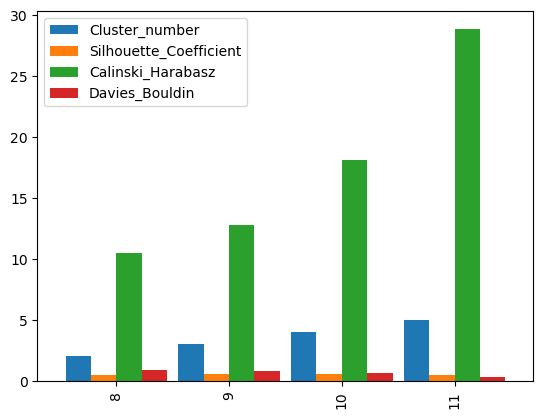

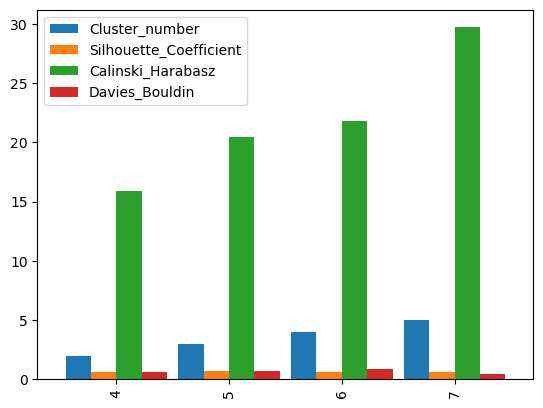

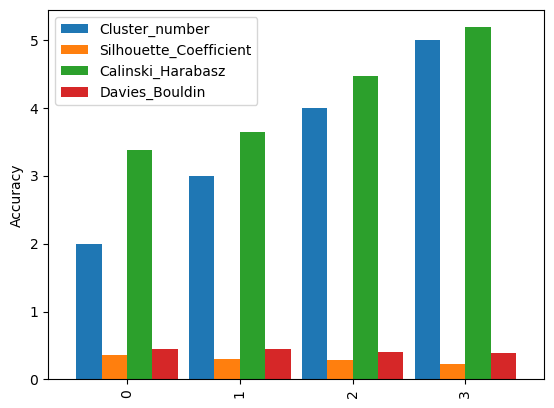

In [25]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
splot=data.groupby(["Data",])["Cluster_number","Silhouette_Coefficient","Calinski_Harabasz","Davies_Bouldin"].plot(kind = "bar",width=0.9);
plt.ylabel("Accuracy")